In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("data/weather_forecast_data.csv")

In [12]:
df

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,1
1,27.879734,46.489704,5.952484,4.990053,992.614190,0
2,25.069084,83.072843,1.371992,14.855784,1007.231620,0
3,23.622080,74.367758,7.050551,67.255282,982.632013,1
4,20.591370,96.858822,4.643921,47.676444,980.825142,0
...,...,...,...,...,...,...
2495,21.791602,45.270902,11.807192,55.044682,1017.686181,0
2496,27.558479,46.481744,10.884915,39.715133,1008.590961,0
2497,28.108274,43.817178,2.897128,75.842952,999.119187,0
2498,14.789275,57.908105,2.374717,2.378743,1046.501875,0


In [9]:
df.isna().sum()

Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64

In [10]:
df["Rain"] = df["Rain"].replace(["rain", "no rain"], [1, 0])

C:\Users\polis\AppData\Local\Temp\ipykernel_15808\3481122692.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Rain"] = df["Rain"].replace(["rain", "no rain"], [1, 0])


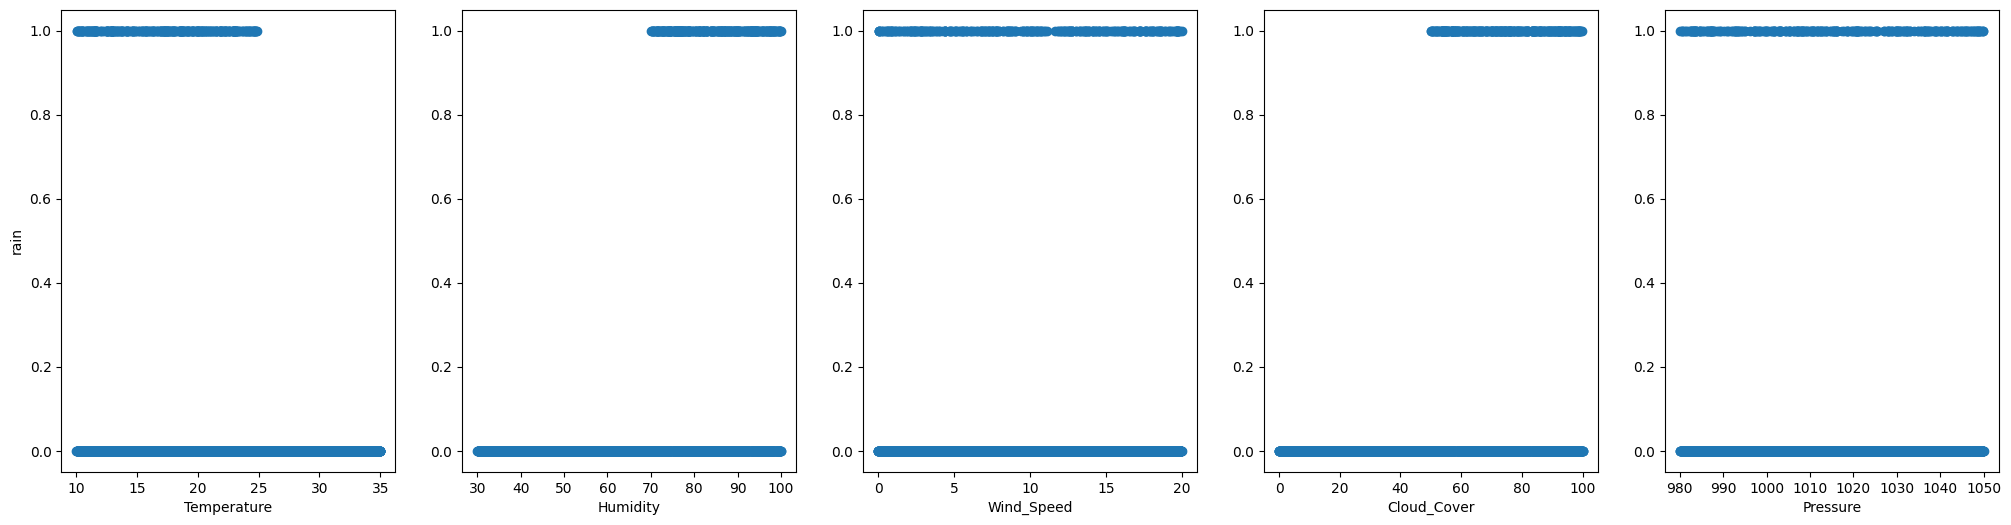

In [41]:
plt.figure(figsize=(25,6))
plt.subplot(1,5,1)
plt.scatter(x=df["Temperature"], y=df["Rain"])
plt.ylabel("rain")
plt.xlabel("Temperature")
plt.subplot(1,5,2)
plt.scatter(x=df["Humidity"], y=df["Rain"])
plt.xlabel("Humidity")
plt.subplot(1,5,3)
plt.scatter(x=df["Wind_Speed"], y=df["Rain"])
plt.xlabel("Wind_Speed")
plt.subplot(1,5,4)
plt.scatter(x=df["Cloud_Cover"], y=df["Rain"])
plt.xlabel("Cloud_Cover")
plt.subplot(1,5,5)
plt.scatter(x=df["Pressure"], y=df["Rain"])
plt.xlabel("Pressure")
plt.show()

In [48]:
df.corr()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
Temperature,1.000000,-0.014119,-0.004957,0.006632,-0.007489,-0.265882
Humidity,-0.014119,1.000000,0.003816,0.007244,-0.032089,0.382464
Wind_Speed,-0.004957,0.003816,1.000000,-0.000405,0.018772,-0.001389
Cloud_Cover,0.006632,0.007244,-0.000405,1.000000,0.023100,0.326216
Pressure,-0.007489,-0.032089,0.018772,0.023100,1.000000,0.008273
Rain,-0.265882,0.382464,-0.001389,0.326216,0.008273,1.000000


In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score

In [76]:
X=df.drop(columns=["Rain"])
y=df[["Rain"]]

In [77]:
scaler = StandardScaler()
scaler_X = scaler.fit_transform(X)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(scaler_X, y, test_size=0.2, random_state=42)

In [83]:
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\polis\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [84]:
pred = model.predict(X_test)

In [85]:
PS = precision_score(y_test, pred)
RS = recall_score(y_test, pred)

In [86]:
print(f"RAIN: {pred.mean() *100}%")
print(f"Точность: {PS}")
print(f"Полнота: {RS}")

RAIN: 9.8%
Точность: 0.7346938775510204
Полнота: 0.631578947368421
